# TP2: Regresión del valor de valor medio de casas en distritos de California (20Co2025)
**Integrantes:**
- Bernardo Maximiliano José.
- Tacchella Alejandro Nicolás.

Se requiere construir una regresión que permita predecir el valor medio de las casas en distritos de California, EE. UU. (medido en cientos de miles de dólares, es decir, $100,000). Este conjunto de datos proviene del censo de 1990 de EE. UU., donde cada observación corresponde a un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra. Un bloque típicamente tiene una población de entre 600 y 3.000 personas.

Los atributos, en el orden en que se encuentran en el conjunto de datos, son:

- MedInc: Ingreso medio en el bloque
- HouseAge: Edad mediana de las casas en el bloque
- AveRooms: Número promedio de habitaciones por hogar.
- AveBedrms: Número promedio de dormitorios por hogar.
- Population: Población del bloque
- AveOccup: Número promedio de miembros por hogar.
- Latitude: Latitud del bloque
- Longitude: Longitud del bloque

El target es:

- MedHouseVal: Mediana del costo de las casas en el bloque (en unidades de $100,000).
Tareas y preguntas a resolver:

1. Obtener la correlación entre los atributos y entre los atributos y el target. ¿Qué atributo tiene mayor correlación lineal con el target? ¿Cuáles atributos parecen estar más correlacionados entre sí? Se pueden obtener los valores de correlación o graficarlos directamente utilizando un mapa de calor.
2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma tienen los histogramas? ¿Se observa alguna forma de campana que sugiera que los datos provienen de una distribución gaussiana, sin realizar pruebas de hipótesis?
3. Calcular la regresión lineal utilizando todos los atributos. Con el conjunto de entrenamiento, calcular la varianza total del modelo y la varianza explicada por el modelo. ¿Está el modelo capturando el comportamiento del target? Expanda su respuesta.
4. Calcular las métricas de MSE, MAE y R² para el conjunto de evaluación.
5. Crear una regresión de Ridge. Usando validación cruzada de 5 folds y tomando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α.
6. Comparar entre la regresión lineal y la mejor regresión de Ridge los resultados obtenidos en el conjunto de evaluación. ¿Cuál de los dos modelos da mejores resultados (usando MSE y MAE)? Conjeturar por qué el modelo que da mejores resultados mejora. ¿Qué error se puede haber reducido?


### **Resolución**

#### **Instalación de dependencias**

In [20]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


#### **Importación de bibliotecas**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

#### **Lectura del dataset**

In [22]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


1. Obtener la correlación entre los atributos y entre los atributos y el target. ¿Qué atributo tiene mayor correlación lineal con el target? ¿Cuáles atributos parecen estar más correlacionados entre sí? Se pueden obtener los valores de correlación o graficarlos directamente utilizando un mapa de calor.

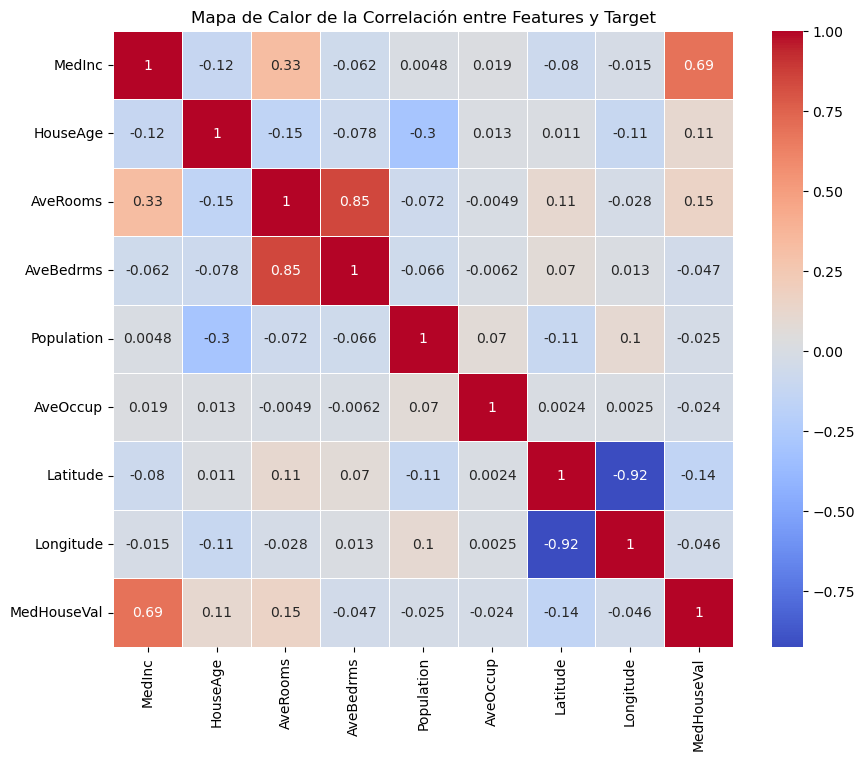

In [24]:
correlation_matrix = df_california.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Features y Target')
plt.show()

Según lo que se observa en el mapa de calor el atributo que tiene mayor correlación lineal con el target (MedHouseVal) es MedInc. Por otro lado, los atributos que se observa que están más correlacionados entre sí son AveRooms y AveBedrms, y Latitude y Longitude. 

2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma tienen los histogramas? ¿Se observa alguna forma de campana que sugiera que los datos provienen de una distribución gaussiana, sin realizar pruebas de hipótesis?

Primero graficamos todos los histogramas de los features y del label para tener una primera idea de sus distribuciones.

<Figure size 1000x600 with 0 Axes>

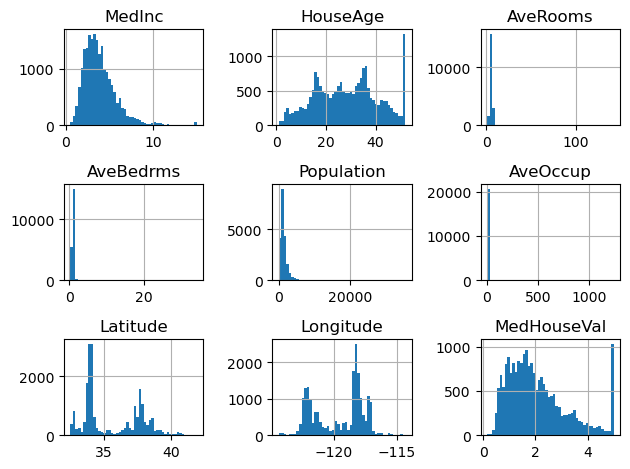

In [25]:
plt.figure(figsize=(10, 6))  # Ajustar según sea necesario

# Dibuja el histograma
df_california.hist(bins=50)

# Ajusta el layout para evitar superposición
plt.tight_layout()

# Muestra el gráfico
plt.show()

Viendo esto podemos decir sobre AveRooms, AveBedrms, Population, AveOccup, Latitude y Longitude que no se ve ninguna distribución clara. Pero sobre MedInc, HouseAge y MedHouseVal vale la pena analizar cada caso, entonces graficamos los histogramas de estos individualmente.

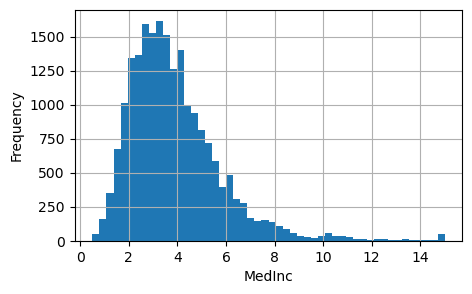

In [26]:
plt.figure(figsize=(5, 3))
df_california["MedInc"].hist(bins=50)
plt.xlabel("MedInc")
plt.ylabel("Frequency")
plt.show()

Podemos ver entonces que MedInc parece una distribución Gaussiana a la mitad ya que no tiene sentido en el contexto del problema un ingreso medio negaativo.

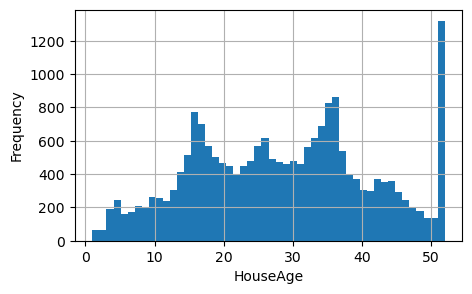

In [27]:
plt.figure(figsize=(5, 3))
df_california["HouseAge"].hist(bins=50)
plt.xlabel("HouseAge")
plt.ylabel("Frequency")
plt.show()

Por otro lado al ver el gráfico con más detalle no podemos encontrar una distribución clara para HouseAge.

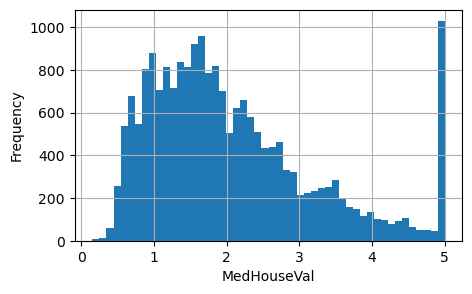

In [28]:
plt.figure(figsize=(5, 3))
df_california["MedHouseVal"].hist(bins=50)
plt.xlabel("MedHouseVal")
plt.ylabel("Frequency")
plt.show()

Finalmente al igual que MedInc podemos ver que MedHouseVal parece una distribución Gaussiana a la mitad ya que no tiene sentido en el contexto del problema un valor de propiedad negativo.

3. Calcular la regresión lineal utilizando todos los atributos. Con el conjunto de entrenamiento, calcular la varianza total del modelo y la varianza explicada por el modelo. ¿Está el modelo capturando el comportamiento del target? Expanda su respuesta.

In [29]:
# Dividimos el dataset en entrenamiento y prueba
# 70% entrenamiento, 30% prueba
# random_state es para que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

# Escalemos los datos
scaler = StandardScaler()
# Entrenamiento: aprende las medias y stds y transforma
X_train_scaled = scaler.fit_transform(X_train)
# Prueba: usa las mismas medias y stds para transformar
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

# Datos de train y de test
print("Dimensión de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimensión de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimensión de X_train: (14448, 8)
Valores de y_train: 14448
Dimensión de X_test: (6192, 8)
Valores de y_test: 6192


In [30]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
# Predicción
y_model = model.predict(X_train_scaled)

# Media de los valores de entrenamiento
y_train_mean = y_train.mean()

# Varianza total y varianza explicada
num_attributes = len(california_housing['feature_names'])
total_var = np.sum((y_train - y_train_mean)**2)/(y_train.size - num_attributes - 1)
explained_var = np.sum((y_model - y_train_mean)**2)/(y_train.size - num_attributes - 1)

print(f"Varianza total del modelo: {round(total_var, 3)}")
print(f"Varianza explicada por el modelo: {round(explained_var, 3)}")
print(f"Precisión del modelo: {round(explained_var/total_var, 3)}")

Varianza total del modelo: 1.341
Varianza explicada por el modelo: 0.817
Precisión del modelo: 0.609


De estos resultados se puede concluir que el modelo captura el comportamiento del target en un 60%.

4. Calcular las métricas de MSE, MAE y R² para el conjunto de evaluación.

In [32]:
y_pred = model.predict(X_test_scaled)

In [33]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-cuadrado en test:", round(r2, 3))
print("Error absoluto medio:", round(mae, 3))
print("Error cuadrático medio:", round(mse, 3))

R-cuadrado en test: 0.596
Error absoluto medio: 0.527
Error cuadrático medio: 0.531


5. Crear una regresión de Ridge. Usando validación cruzada de 5 folds y tomando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α.

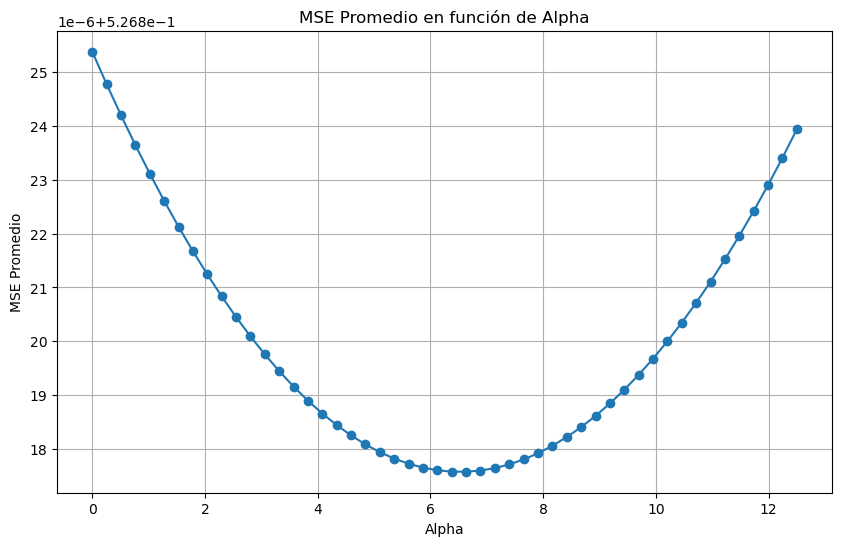

Mejor alpha: 6.63265306122449
MSE promedio con el mejor alpha: 0.5268175783548106


In [34]:
alphas = np.linspace(0, 12.5, 50)  # 50 valores entre 0 y 12.5
mean_mses = []  # Para almacenar los MSE promedio por cada alpha

for alpha in alphas:
    model_r = Ridge(alpha=alpha)
    scores = cross_val_score(model_r, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    mean_mse = -scores.mean()  # Convertir a positivo
    mean_mses.append(mean_mse)

# Graficar el MSE promedio en función de alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_mses, marker='o')
plt.title('MSE Promedio en función de Alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE Promedio')
plt.grid()
plt.show()
# Elegimos el mejor alpha
best_alpha = alphas[np.argmin(mean_mses)]
print(f"Mejor alpha: {best_alpha}")
print(f"MSE promedio con el mejor alpha: {min(mean_mses)}")

6. Comparar entre la regresión lineal y la mejor regresión de Ridge los resultados obtenidos en el conjunto de evaluación. ¿Cuál de los dos modelos da mejores resultados (usando MSE y MAE)? Conjeturar por qué el modelo que da mejores resultados mejora. ¿Qué error se puede haber reducido?

In [35]:
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
print("R-cuadrado en test con Ridge:", round(r2, 3))
print("Error absoluto medio con Ridge:", round(mae, 3))
print("Error cuadrático medio con Ridge:", round(mse, 3))

R-cuadrado en test con Ridge: 0.596
Error absoluto medio con Ridge: 0.527
Error cuadrático medio con Ridge: 0.53


Basándonos en los resultados obtenidos de usar $R^2$ con la regresión completa y la regresión de Ridge, podemos concluir que aplicar Ridge no mejora la predicción. Esto se debe a que desde un principio no había demasiada varianza en los errores, esto se puede interpretar a partir del MSE de 0.53 que si bien no es muy bajo tampoco es demasiado alto, por lo que no se puede asegurar que haya un alto error de varianza. También se puede notar que la cantidad de features es muy inferior a la cantidad de muestras, cuando Ridge mejora las predicciones en casos en que hay muchos features y pocas muestras.